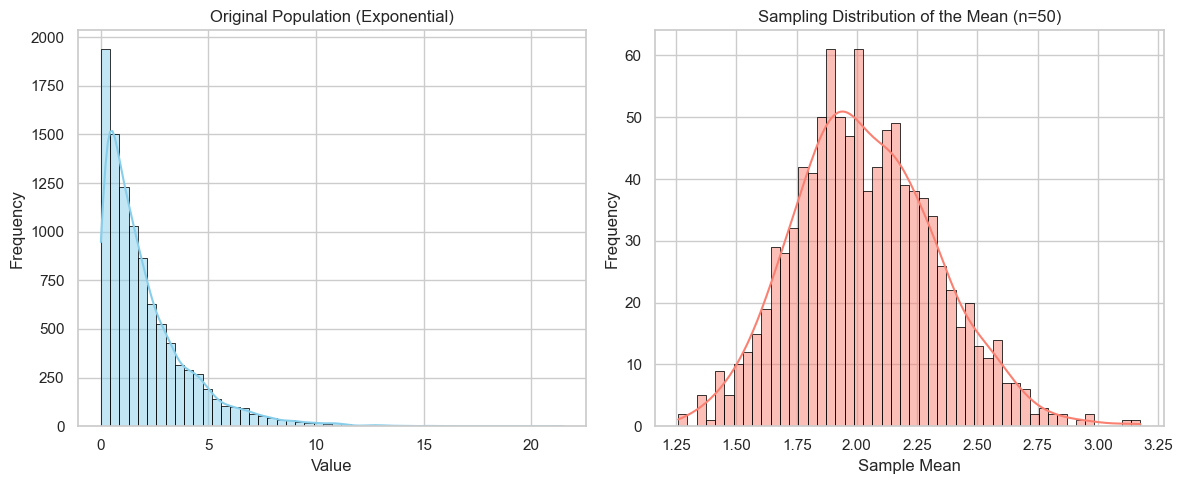

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set Seaborn style
sns.set(style="whitegrid")

# Population: 10,000 random values from a skewed distribution
population = np.random.exponential(scale=2, size=10000)

# Take 1000 samples of size 50, calculate their means
sample_means = [np.mean(np.random.choice(population, size=50)) for _ in range(1000)]

# Create a DataFrame for easier plotting with Seaborn
df = pd.DataFrame({
    'Population': population,
    'Sample Mean': np.nan  # Initialize with NaNs to be filled later
})

# We'll create a second DataFrame for the sample means
df_sample_means = pd.DataFrame({'Sample Mean': sample_means})

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot population distribution
sns.histplot(population, bins=50, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Original Population (Exponential)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Plot sampling distribution of the mean
sns.histplot(sample_means, bins=50, kde=True, color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Sampling Distribution of the Mean (n=50)')
axes[1].set_xlabel('Sample Mean')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


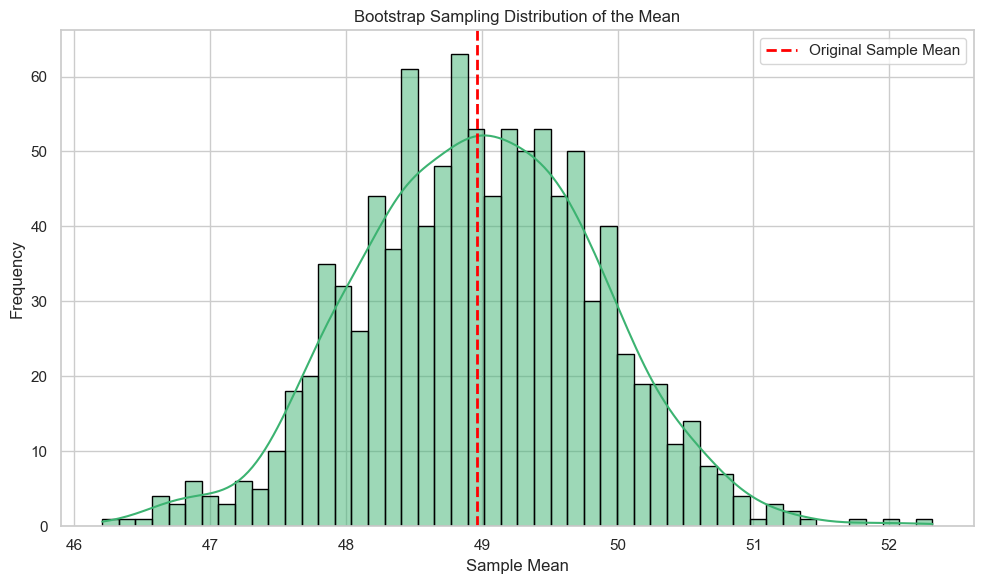

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Original sample (could be from any dataset)
original_sample = np.random.normal(loc=50, scale=10, size=100)

# Number of bootstrap resamples
n_resamples = 1000

# Store bootstrap means
bootstrap_means = []

# Generate bootstrap samples and compute means
for _ in range(n_resamples):
    resample = np.random.choice(original_sample, size=len(original_sample), replace=True)
    bootstrap_means.append(np.mean(resample))

# Plotting the bootstrap sampling distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=50, kde=True, color='mediumseagreen', edgecolor='black')
plt.title('Bootstrap Sampling Distribution of the Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.axvline(np.mean(original_sample), color='red', linestyle='dashed', linewidth=2, label='Original Sample Mean')
plt.legend()
plt.tight_layout()
plt.show()


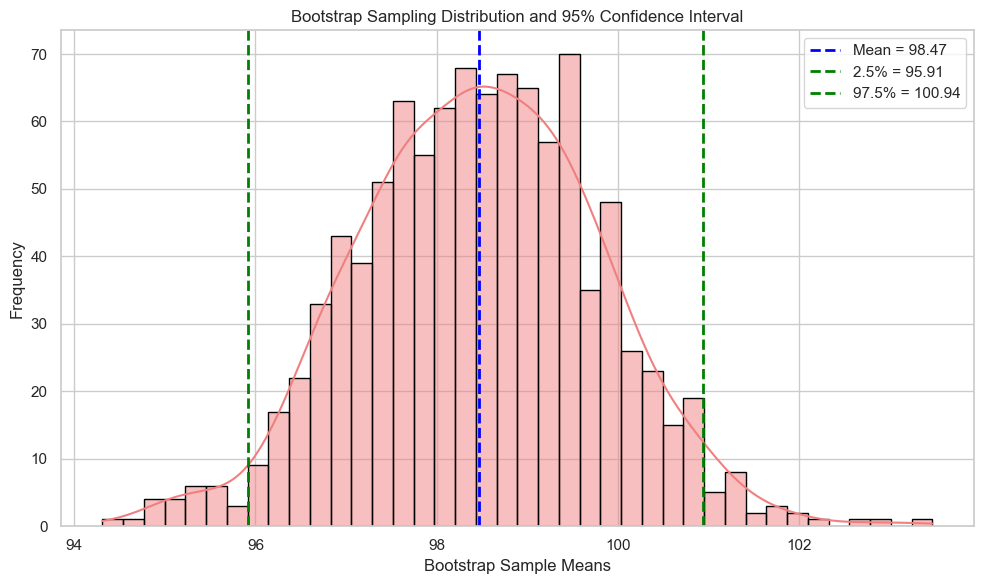

Bootstrap Mean: 98.47
95% Confidence Interval (Bootstrap): (95.91, 100.94)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Step 1: Generate sample data
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=100)  # mean=100, std=15, n=100

# Step 2: Bootstrap sampling
n_bootstraps = 1000
bootstrap_means = []

for _ in range(n_bootstraps):
    resample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(resample))

# Step 3: Calculate 95% confidence interval from bootstrap distribution
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
bootstrap_mean = np.mean(bootstrap_means)

# Step 4: Plot the bootstrap sampling distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=40, kde=True, color='lightcoral', edgecolor='black')
plt.axvline(bootstrap_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean = {bootstrap_mean:.2f}')
plt.axvline(lower_bound, color='green', linestyle='--', linewidth=2, label=f'2.5% = {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', linewidth=2, label=f'97.5% = {upper_bound:.2f}')
plt.title('Bootstrap Sampling Distribution and 95% Confidence Interval')
plt.xlabel('Bootstrap Sample Means')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Print the confidence interval
print(f"Bootstrap Mean: {bootstrap_mean:.2f}")
print(f"95% Confidence Interval (Bootstrap): ({lower_bound:.2f}, {upper_bound:.2f})")


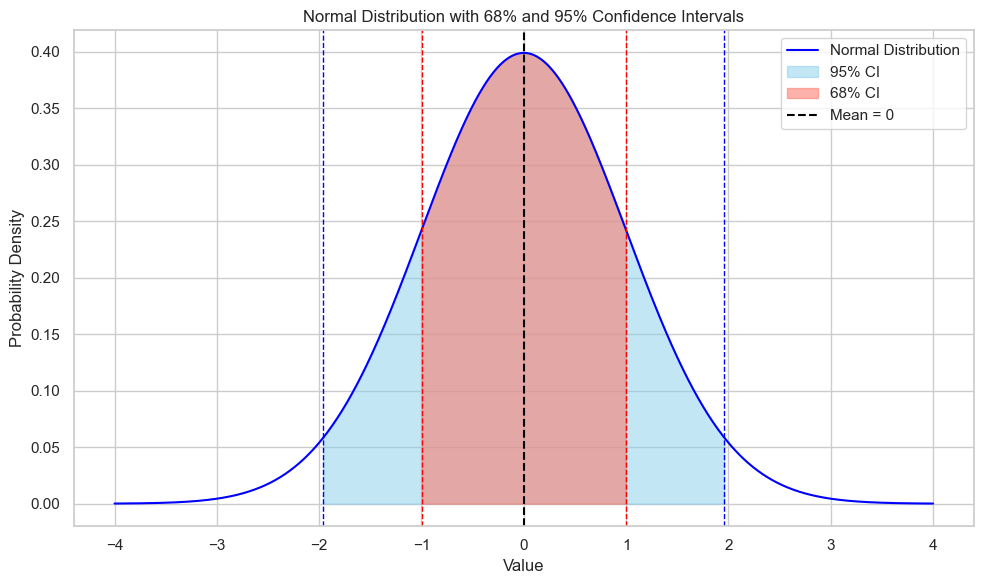

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set plot style
sns.set(style="whitegrid")

# Parameters
mean = 0
std_dev = 1
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)

# Compute z-scores for 68% and 95% CIs
z_68 = norm.ppf(0.84)  # 1 standard deviation (68% total)
z_95 = norm.ppf(0.975)  # 1.96 standard deviations (95% total)

# Confidence Interval bounds
ci_68 = (mean - z_68, mean + z_68)
ci_95 = (mean - z_95, mean + z_95)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', color='blue')

# Shade 95% CI
x_fill_95 = np.linspace(ci_95[0], ci_95[1], 1000)
plt.fill_between(x_fill_95, norm.pdf(x_fill_95, mean, std_dev), color='skyblue', alpha=0.5, label='95% CI')

# Shade 68% CI
x_fill_68 = np.linspace(ci_68[0], ci_68[1], 1000)
plt.fill_between(x_fill_68, norm.pdf(x_fill_68, mean, std_dev), color='salmon', alpha=0.6, label='68% CI')

# Add vertical lines
plt.axvline(mean, color='black', linestyle='--', linewidth=1.5, label='Mean = 0')
plt.axvline(ci_95[0], color='blue', linestyle='--', linewidth=1)
plt.axvline(ci_95[1], color='blue', linestyle='--', linewidth=1)
plt.axvline(ci_68[0], color='red', linestyle='--', linewidth=1)
plt.axvline(ci_68[1], color='red', linestyle='--', linewidth=1)

# Labels and title
plt.title('Normal Distribution with 68% and 95% Confidence Intervals')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.tight_layout()
plt.show()


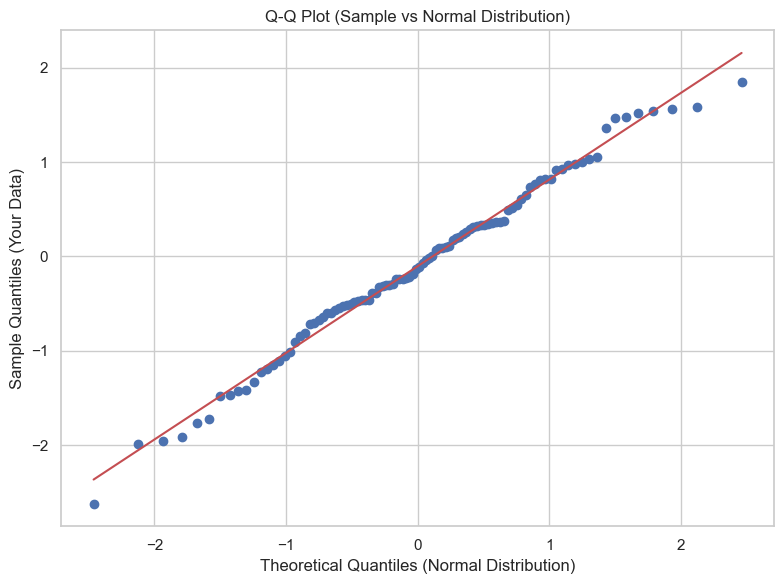

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=100)  # Normally distributed data

# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot (Sample vs Normal Distribution)")
plt.xlabel("Theoretical Quantiles (Normal Distribution)")
plt.ylabel("Sample Quantiles (Your Data)")
plt.grid(True)
plt.tight_layout()
plt.show()

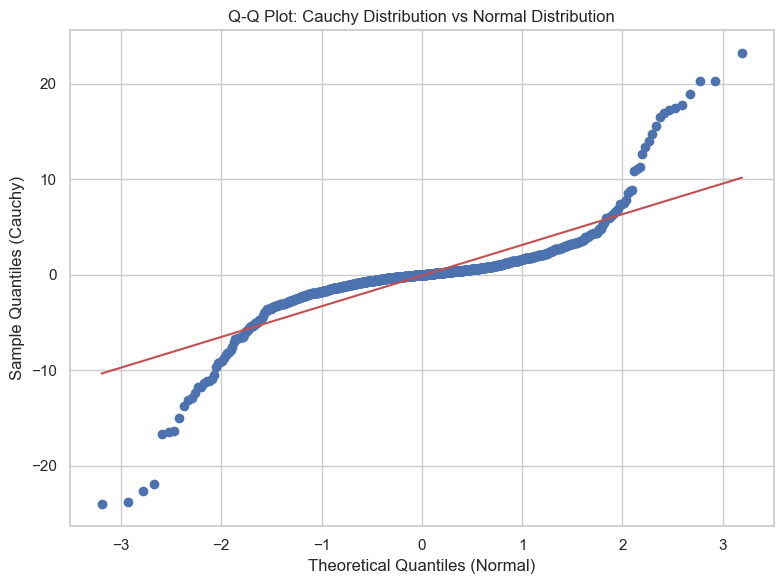

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate long-tailed data: e.g., Cauchy distribution
np.random.seed(42)
data = np.random.standard_cauchy(size=1000)

# Limit extreme values for better visualization (Cauchy can produce huge outliers)
data = data[(data > -25) & (data < 25)]

# Create Q-Q plot against normal distribution
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot: Cauchy Distribution vs Normal Distribution")
plt.xlabel("Theoretical Quantiles (Normal)")
plt.ylabel("Sample Quantiles (Cauchy)")
plt.grid(True)
plt.tight_layout()
plt.show()


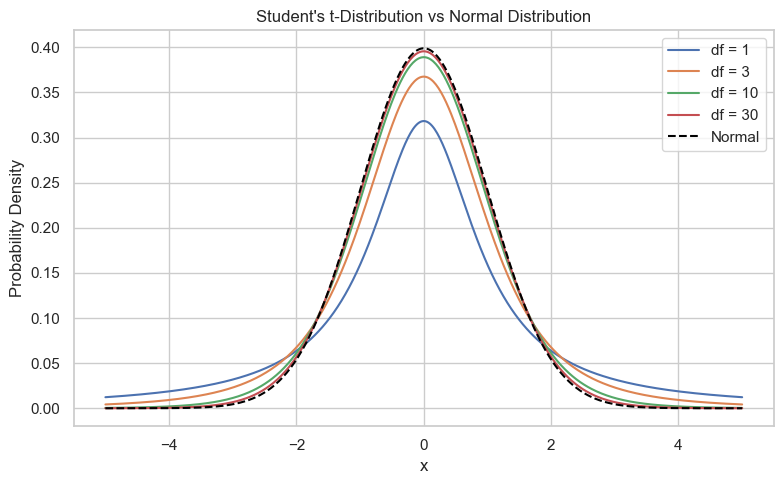

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define t-distributions with different degrees of freedom
x = np.linspace(-5, 5, 500)
dfs = [1, 3, 10, 30]

plt.figure(figsize=(8, 5))
for df in dfs:
    plt.plot(x, stats.t.pdf(x, df), label=f'df = {df}')

# Plot the standard normal for comparison
plt.plot(x, stats.norm.pdf(x), label='Normal', linestyle='--', color='black')

plt.title("Student's t-Distribution vs Normal Distribution")
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


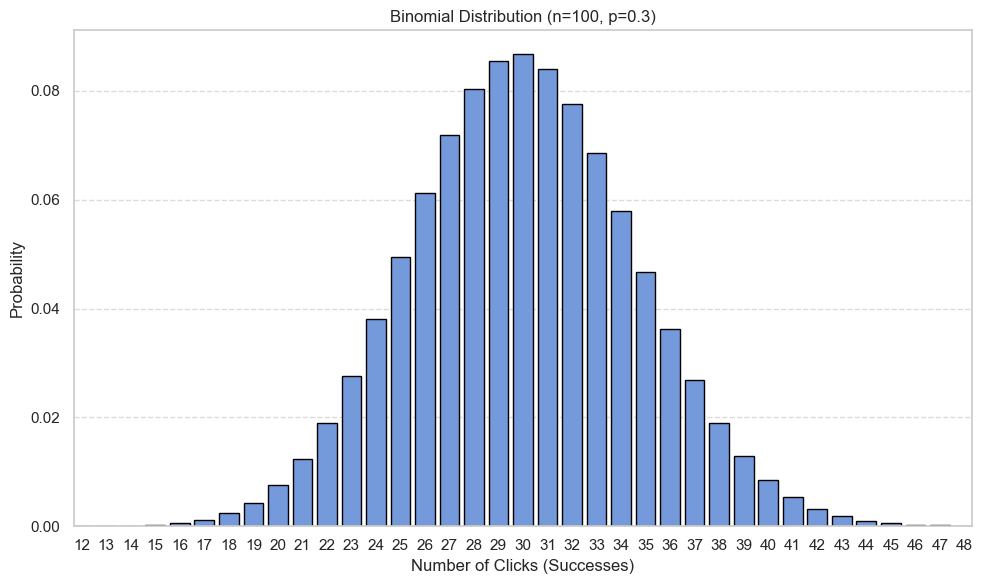

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

# Parameters for the binomial distribution
n = 100        # number of trials (e.g., users)
p = 0.3        # probability of success (e.g., click)

# Define possible values and compute PMF (probability mass function)
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

# Plotting the binomial distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=pmf, color="cornflowerblue", edgecolor='black')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Clicks (Successes)')
plt.ylabel('Probability')
plt.xlim(p*n - 4*np.sqrt(n*p*(1-p)), p*n + 4*np.sqrt(n*p*(1-p)))  # focus on the central mass
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


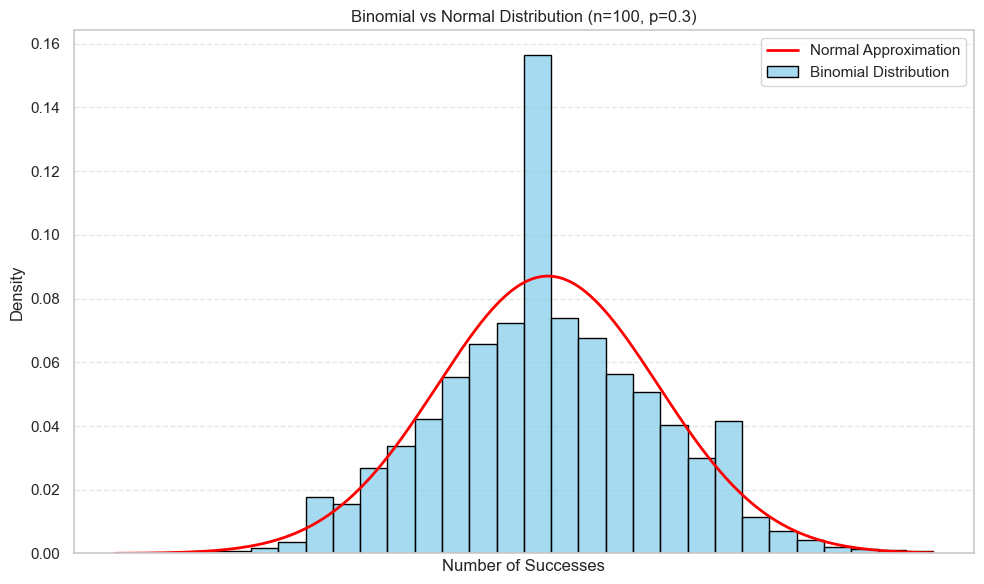

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Parameters
n = 100           # Number of trials
p = 0.3           # Probability of success
num_samples = 10000  # Number of simulations

# Simulate binomial data
binom_data = np.random.binomial(n=n, p=p, size=num_samples)

# Calculate mean and standard deviation for normal approximation
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histogram of binomial data
sns.histplot(binom_data, bins=30, stat='density', color='skyblue', edgecolor='black', label='Binomial Distribution')

# Plot normal approximation
x = np.linspace(min(binom_data), max(binom_data), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', linewidth=2, label='Normal Approximation')

# Formatting
plt.title(f'Binomial vs Normal Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Density')
plt.xticks([], [])  # Removes x-axis tick labels
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


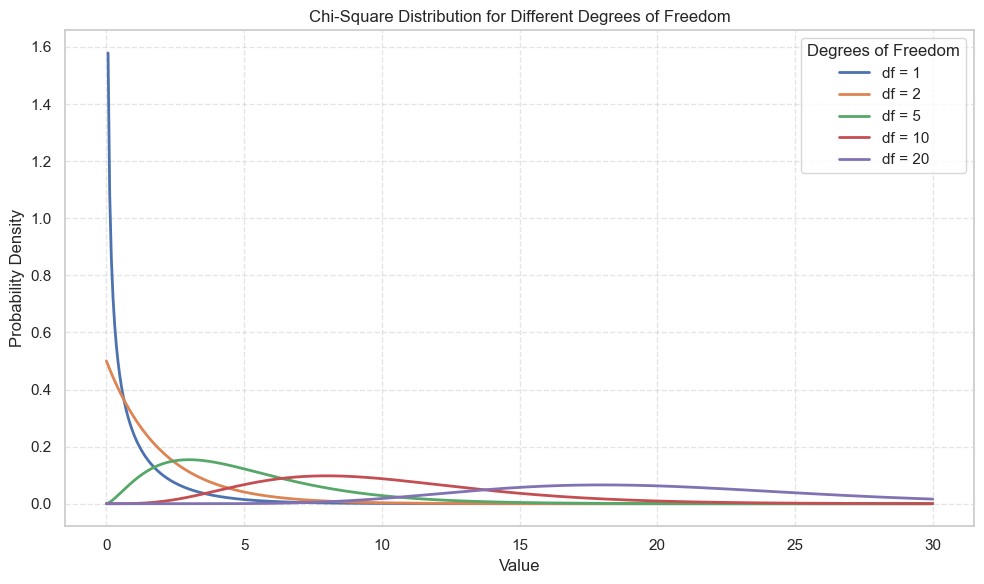

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Define a range of x values
x = np.linspace(0, 30, 500)

# Degrees of freedom to plot
dfs = [1, 2, 5, 10, 20]

# Plot the chi-square distributions
plt.figure(figsize=(10, 6))
for df in dfs:
    plt.plot(x, chi2.pdf(x, df), label=f'df = {df}', linewidth=2)

# Formatting the plot
plt.title('Chi-Square Distribution for Different Degrees of Freedom')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(title='Degrees of Freedom')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


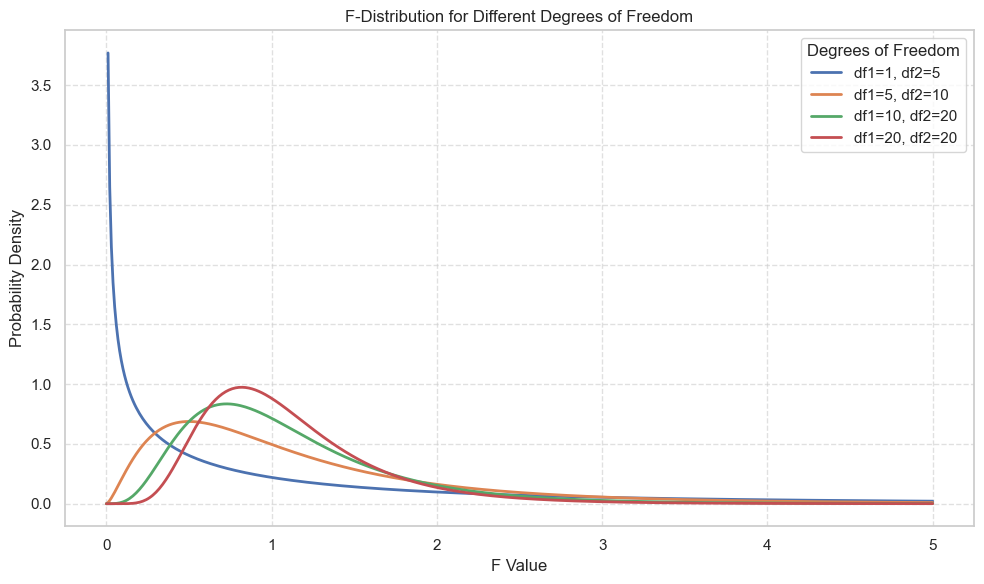

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Define x range
x = np.linspace(0, 5, 500)

# Define pairs of degrees of freedom (df numerator, df denominator)
df_pairs = [(1, 5), (5, 10), (10, 20), (20, 20)]

# Plot F-distributions
plt.figure(figsize=(10, 6))
for dfn, dfd in df_pairs:
    y = f.pdf(x, dfn, dfd)
    plt.plot(x, y, label=f'df1={dfn}, df2={dfd}', linewidth=2)

# Customize plot
plt.title('F-Distribution for Different Degrees of Freedom')
plt.xlabel('F Value')
plt.ylabel('Probability Density')
plt.legend(title='Degrees of Freedom')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


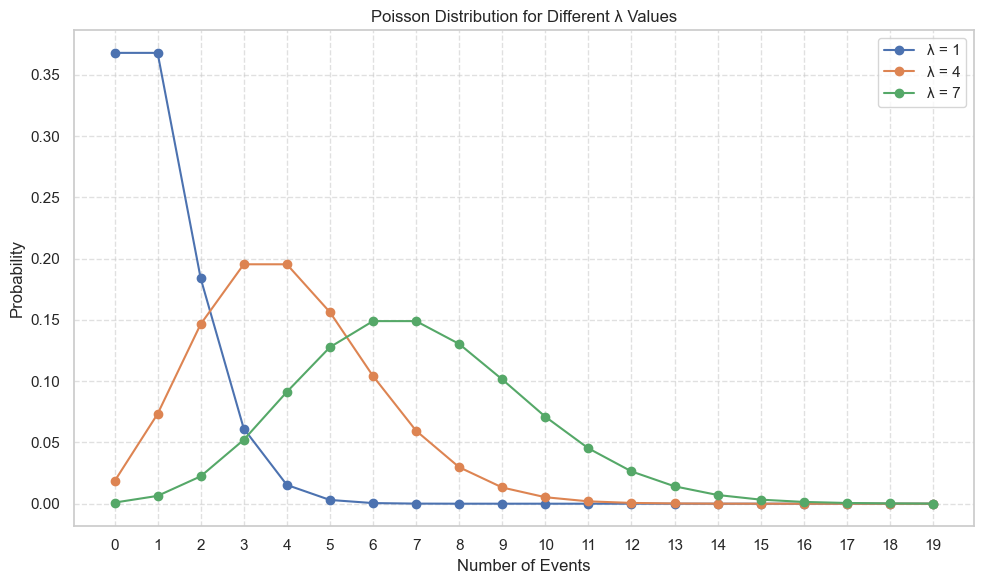

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Different lambda values to compare
lambdas = [1, 4, 7]

# x values (number of events)
x = np.arange(0, 20)

plt.figure(figsize=(10, 6))

# Plot Poisson PMFs for each lambda
for lam in lambdas:
    pmf = poisson.pmf(x, lam)
    plt.plot(x, pmf, marker='o', linestyle='-', label=f'λ = {lam}')

# Formatting
plt.title('Poisson Distribution for Different λ Values')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.xticks(x)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



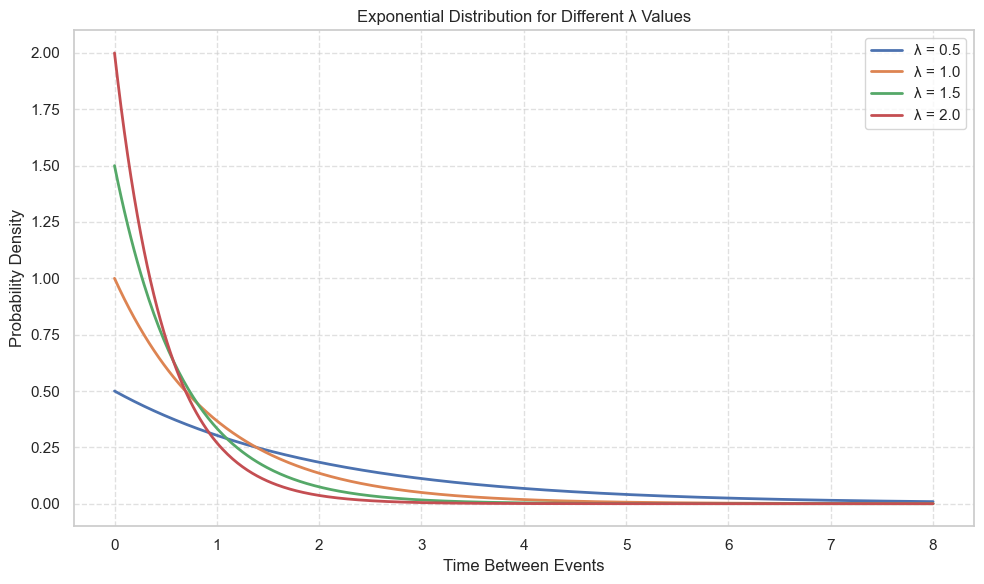

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Different lambda (rate) values
lambdas = [0.5, 1.0, 1.5, 2.0]

# x values
x = np.linspace(0, 8, 500)

plt.figure(figsize=(10, 6))

# Plot Exponential PDFs for each lambda
for lam in lambdas:
    scale = 1 / lam
    pdf = expon.pdf(x, scale=scale)
    plt.plot(x, pdf, label=f'λ = {lam}', linewidth=2)

# Formatting
plt.title('Exponential Distribution for Different λ Values')
plt.xlabel('Time Between Events')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:2509: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


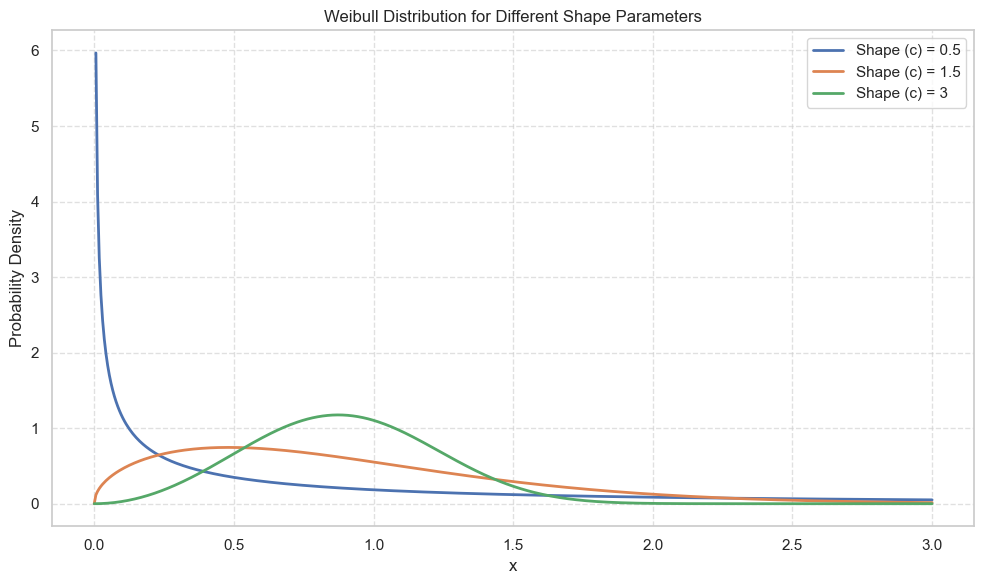

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Define shape parameters to compare
shapes = [0.5, 1.5, 3]

# Scale parameter (often set to 1 for simplicity)
scale = 1

# x values
x = np.linspace(0, 3, 500)

plt.figure(figsize=(10, 6))

# Plot Weibull PDFs for different shape parameters
for c in shapes:
    pdf = weibull_min.pdf(x, c, scale=scale)
    plt.plot(x, pdf, label=f'Shape (c) = {c}', linewidth=2)

# Formatting
plt.title('Weibull Distribution for Different Shape Parameters')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
